# Análisis de Viajes en Taxi para Zuber

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivos](#obj)
* [Etapa 1. Descripción de los datos](#data_review)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
* [Etapa 3. Prueba de hipótesis](#hypothesis)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
En este proyecto, trabajamos como analistas para Zuber una nueva empresa de viajes compartidos que se está lanzando en Chicago. Queremos obtener patrones en la información disponible.y comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. 

## Objetivos: <a id='obj'></a>
Probar la hipótesis:
1. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


## Etapas:
El proyecto consistirá en tres etapas:
 1. Descripción de los datos.
 2. Preprocesamiento de datos.
 3. Prueba de hipótesis.


## Etapa 1. Descripción de los datos <a id='data_review'></a>

Trabajaremos con tres datasets:

1. project_sql_result_01.csv. Contiene los siguientes datos: 

- company_name: nombre de la empresa de taxis

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

2. project_sql_result_04.csv. Contiene los siguientes datos:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

3. project_sql_result_07.csv: Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Contiene los siguientes datos:

- start_ts: fecha y hora de recogida

- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

- duration_seconds: duración del viaje en segundos

## Etapa 2. Preprocesamiento de datos <a id='data_preprocessing)'>

In [50]:
#importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Exploracion Inicial de Datos

In [45]:
#cargamos los datasets
df_1=pd.read_csv('project_sql_result_01.csv')
df_2=pd.read_csv('project_sql_result_04.csv')
df_3=pd.read_csv('project_sql_result_07.csv')

In [46]:
print(df_1.describe())
print(df_1.info())
print(df_1.head())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


Con la informacion del dataset 1 y una vista rapida con el metodo describe empezamos a ver en que podemos trabajar. Observamos el numero de filas, y algunas estadisticas iniciales, contando con un promedio de viajes de 2145. Con el metodo info y head observamos que no hay datos nulos, y los tipos de datos son correctos.

In [47]:
print(df_2.describe())
print(df_2.info())
print(df_2.head())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


Con la informacion del dataset 2 y una vista rapida con el metodo describe empezamos a ver en que podemos trabajar. Observamos el numero de filas, y algunas estadisticas iniciales, contando con un promedio de viajes de casi 600. Con el metodo info y head observamos que no hay datos nulos, y los tipos de datos son correctos. Ademas de que el maximo destino final es Loop con 10727 viajes en promedio.

In [48]:
print(df_3.describe())
print(df_3.info())
print(df_3.head())

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


Con la informacion del dataset 3 y una vista rapida con el metodo describe empezamos a ver en que podemos trabajar. Observamos el numero de filas, y algunas estadisticas iniciales, contando con un promedio de viajes de 2071. Con el metodo info y head observamos que no hay datos nulos, y en los tipos de datos debemos cambiar el start_ts ya que se refiere a una fecha no un object. Tambien tenemos que la duracion en segundos esta en float lo cual lo pudieramos cambiar a int si no cambia el resultado final corroborando con el metodo np_equal_array.

In [51]:
#cambiamos de tipo object a datetime
df_3['start_ts']= pd.to_datetime(df_3['start_ts'])
#verificamos si es sseguro cambiar de float a int
np.array_equal(df_3['duration_seconds'],df_3['duration_seconds'].astype('int'))

True

In [52]:
#cambiamos de tipo y verificamos
df_3['duration_seconds']=df_3['duration_seconds'].astype('int')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


In [35]:
df_1.duplicated().sum()

0

In [36]:
df_2.duplicated().sum()

0

In [37]:
df_3.duplicated().sum()

197

In [38]:
df_3=df_3.drop_duplicates()
df_3.duplicated().sum()

0

## Analisis de Datos

Identificaremos los 10 principales barrios en términos de finalización.

In [39]:
df_top_names = df_2.groupby('dropoff_location_name').sum().sort_values(by='average_trips', ascending=False)
df_top_names = df_top_names.head(10)
print(df_top_names)

                       average_trips
dropoff_location_name               
Loop                    10727.466667
River North              9523.666667
Streeterville            6664.666667
West Loop                5163.666667
O'Hare                   2546.900000
Lake View                2420.966667
Grant Park               2068.533333
Museum Campus            1510.000000
Gold Coast               1364.233333
Sheffield & DePaul       1259.766667


In [40]:
df_names = df_1.groupby('company_name').sum().sort_values(by='trips_amount', ascending=False)
df_names = df_names.head(10)
print(df_names)

                                   trips_amount
company_name                                   
Flash Cab                                 19558
Taxi Affiliation Services                 11422
Medallion Leasin                          10367
Yellow Cab                                 9888
Taxi Affiliation Service Yellow            9299
Chicago Carriage Cab Corp                  9181
City Service                               8448
Sun Taxi                                   7701
Star North Management LLC                  7455
Blue Ribbon Taxi Association Inc.          5953


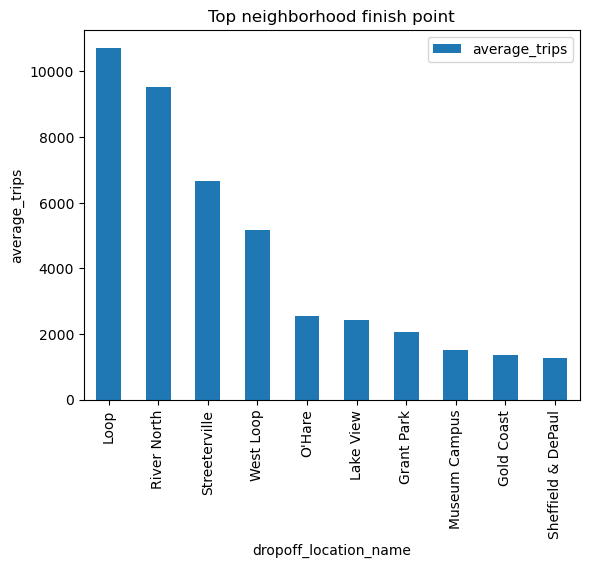

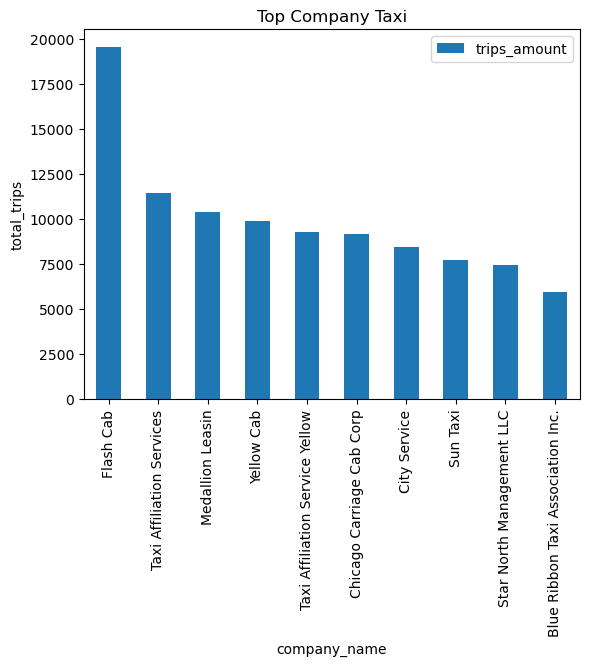

In [41]:
df_top_bar= df_top_names.plot(kind='bar', title='Top neighborhood finish point',ylabel='average_trips')

df_name_bar=df_names.plot(kind='bar', title='Top Company Taxi',ylabel='total_trips')

plt.show()

Se puede observar que el mejor dropoof location es Loop (el mas popular), y la compañia de taxis que mas viajes tuvo entre el 15 y 16 de noviembre del 2017 fue Flash Cab

## Etapa 3. Prueba de Hipotesis <a id='hypothesis'></a>

H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.




In [42]:
df_3_rain=df_3[(df_3['start_ts'].dt.dayofweek == 5) & (df_3['weather_conditions']== 'Bad')]
df_3_rain= pd.pivot_table(df_3_rain,values='duration_seconds',aggfunc='mean',
                              index='start_ts')
print(df_3_rain)

                     duration_seconds
start_ts                             
2017-11-04 16:00:00       2942.275862
2017-11-04 17:00:00       2448.562500
2017-11-04 18:00:00       2207.357143
2017-11-18 00:00:00        480.000000
2017-11-18 07:00:00       1402.333333
2017-11-18 08:00:00       1451.266667
2017-11-18 09:00:00       1378.500000
2017-11-18 10:00:00       1813.545455
2017-11-18 12:00:00       2816.409091
2017-11-18 13:00:00       3322.769231
2017-11-18 16:00:00       2801.888889
2017-11-18 17:00:00       2418.333333
2017-11-18 21:00:00       1748.000000


In [43]:
df_3_sunny=df_3[(df_3['start_ts'].dt.dayofweek == 5) & (df_3['weather_conditions']== 'Good')]
df_3_sunny= pd.pivot_table(df_3_sunny,values='duration_seconds',aggfunc='mean',
                              index='start_ts')
print(df_3_sunny)

                     duration_seconds
start_ts                             
2017-11-04 00:00:00       1560.000000
2017-11-04 01:00:00          0.000000
2017-11-04 02:00:00       2956.000000
2017-11-04 04:00:00       1393.800000
2017-11-04 05:00:00       1316.625000
...                               ...
2017-11-25 17:00:00       2400.000000
2017-11-25 18:00:00       2888.857143
2017-11-25 19:00:00       2280.000000
2017-11-25 20:00:00       2040.000000
2017-11-25 23:00:00       1500.000000

[68 rows x 1 columns]


In [44]:
# Prueba si las varianzas son iguales
levene_results = st.levene(df_3_rain['duration_seconds'], df_3_sunny['duration_seconds'])


# Evaluar el resultado de la prueba de Levene
if levene_results.pvalue < 0.05:
    print("Las varianzas no son iguales")
    equal_var = False
else:
    print("Las varianzas son iguales")
    equal_var = True

# Prueba las hipótesis
results_first=st.ttest_ind(df_3_rain['duration_seconds'],df_3_sunny['duration_seconds'],equal_var = equal_var)
alpha=0.05

if (results_first.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print('valor p: ', results_first.pvalue) # extraer el valor p

Las varianzas son iguales
No podemos rechazar la hipótesis nula
valor p:  0.24167305189190524


Formulamos las hipotesis a base de la hipotesis de dos colas ya que se buscaba probar si las medias eran iguales o diferentes entre dos grupos.
se probo la hipotesis con el valor p y con un alpha del 5%. dandonos como resulta que no podemos rechazar la hipotesis, es decir que los viajes en promedio cambian los sabados lluviosos.

## Conclusion <a id='end'></a>

Se concluyo que el análisis de datos puede revelar patrones de preferencia de viaje entre los pasajeros de Zuber. Esto incluiría información sobre barrios preferidos de descarga y compañia de taxis mas popular.

Se puede concluir que si se encuentra una diferencia significativa en la duración de los viajes los sábados lluviosos en comparación con los sábados no lluviosos, sugeriendo que el clima influye en el tráfico y, por lo tanto, en el tiempo de viaje.

Tambien se probo la hipotesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.
